In [1]:
import numpy as np

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    
    def __init__(self, verbose=False):
        
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.gain = None
        self.feature = None
        self.threshold = None
        self.numdata = None
        self.label = None
        self.classes = None
        self.left = None
        self.right = None
        
        
    def calculate_gini(self, y):
        
        self.classes = np.unique(y)        
        gini = 1.0
        
        for c in self.classes:
            gini -= (len(y[y==c]) / len(y)) ** 2
        
        return gini
    
    
    def Information_gain(self, y_left, y_right, gini_p):
        
        y_lr = np.hstack([y_left, y_right])
        
        # 左ノードのジニ不純度
        gini_left = (len(y_left) / len(y_lr)) * self.calculate_gini(y_left)
        
        # 右ノードのジニ不純度
        gini_right = (len(y_right) / len(y_lr)) * self.calculate_gini(y_right)
        
        # 情報利得算出
        IG_p = gini_p - gini_left - gini_right
        
        return IG_p
    
    
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        from collections import Counter
        
        self.numdata = X.shape[0]
        num_features = X.shape[1]
                
        if len(np.unique(y)) == 1:
            self.label = np.unique(y)[0]
            return
        
        class_counts = Counter(y)
        self.label = max(class_counts, key=class_counts.get)

        best_gain = 0.0
        best_feature = None
        best_value = None
        
        # 親ノード
        gini_p = self.calculate_gini(y)
        
        for feature in range(num_features):
            
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
        
                y_left = y[X[:, feature] >= threshold]
                y_right = y[X[:, feature] < threshold]
                
                gain = self.Information_gain(y_left, y_right, gini_p)
                                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
                    
                if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                    print("閾値 : {}".format(threshold))
                    print("左ノード : {}".format(y_left))
                    print("右ノード : {}".format(y_right))
                    print("情報利得 : {}".format(gain))
                    print("-----------------------------end of train : feature={}, threshold={} -------------------------------".format(feature, threshold))

                else:
                    pass    
                
            
        if best_gain == 0:
            return
        
        else:
            self.gain = best_gain
            self.feature = best_feature
            self.threshold = best_threshold
            
            
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred = np.where(X[:, self.feature] >= self.threshold, self.classes[1], self.classes[0])
        
        return y_pred           
            

In [3]:
# シンプルデータセット２

X_simple2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
                                   [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
                                   [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
                                   [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
                                   [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
                                   [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
                                   [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
                                   [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
                                   [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
                                   [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
                                   [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
                                   [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
                                   [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
                                   [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
                                   [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
                                   [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
                                   [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
                                   [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
                                   [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
                                   [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y_simple2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
sdtc = ScratchDecesionTreeClassifierDepth1(verbose=True)

# 【問題1】不純度を求める関数

$$
I(t) = 1 - \sum_{i=1}^{K} P^2 (C_i|t) = 1 - \sum_{i=1}^{K} (\frac{N_{t, i}}{N_{t, all}})^2
$$

In [5]:
gini_p = sdtc.calculate_gini(y_simple2)
gini_p

0.5

# 【問題2】情報利得を求める関数

$$
IG(p) = I(p) - \frac{N_{left, all}}{N_{p, all}} I(left) - \frac{N_{right, all}}{N_{p, all}} I(right)
$$

In [6]:
y_left = y_simple2[:15]
y_right = y_simple2[15:]
sdtc.Information_gain(y_left, y_right, gini_p)

0.3000000000000001

# 【問題3】学習

In [7]:
sdtc.fit(X_simple2, y_simple2)

閾値 : -6.6797
左ノード : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
右ノード : []
情報利得 : 0.0
-----------------------------end of train : feature=0, threshold=-6.6797 -------------------------------
閾値 : -4.1013
左ノード : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
右ノード : [1]
情報利得 : 0.012820512820512775
-----------------------------end of train : feature=0, threshold=-4.1013 -------------------------------
閾値 : -3.5944
左ノード : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
右ノード : [0 1]
情報利得 : 2.0816681711721685e-17
-----------------------------end of train : feature=0, threshold=-3.5944 -------------------------------
閾値 : -3.1625
左ノード : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
右ノード : [0 0 1]
情報利得 : 0.004504504504504396
-----------------------------end of train : feature=0, threshold=-3.1625 -------------------------------
閾値 : -3.1108
左ノード : [0 0 0 0 0 0 0 

# 【問題4】推定

In [8]:
y_pred = sdtc.predict(X_simple2)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# 【問題5】学習と推定

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_simple2, y_pred)
precision = precision_score(y_simple2, y_pred)
recall = recall_score(y_simple2, y_pred)
f1 = f1_score(y_simple2, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

,Accuracy,Precision,Recall,F1
Score,0.675,0.818182,0.45,0.580645


In [10]:
# sklearnの挙動と比較

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_simple2, y_simple2)

In [11]:
sk_pred = clf.predict(X_simple2)
sk_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [12]:
accuracy = accuracy_score(y_simple2, sk_pred)
precision = precision_score(y_simple2, sk_pred)
recall = recall_score(y_simple2, sk_pred)
f1 = f1_score(y_simple2, sk_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

,Accuracy,Precision,Recall,F1
Score,0.675,0.818182,0.45,0.580645


# 【問題6】決定領域の可視化

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

    plt.show()

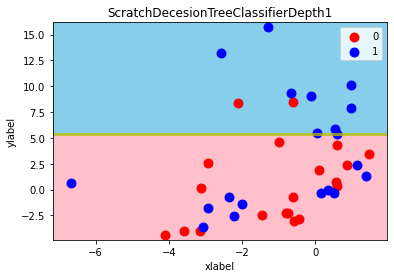

In [14]:
# ScratchDecesionTreeClassifierDepth1 の決定境界

decision_region(X_simple2, y_simple2, sdtc, title='ScratchDecesionTreeClassifierDepth1', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1'])

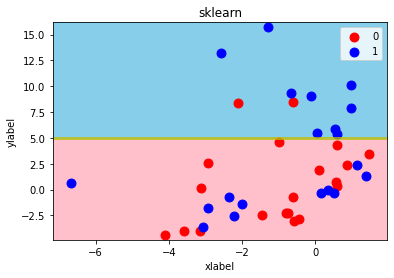

In [15]:
# sklearn の決定境界

decision_region(X_simple2, y_simple2, clf, title='sklearn', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1'])